In [1]:
import numpy as np
import uproot
from matplotlib import pyplot as plt
import matplotlib as mpl
import h5py
from scipy import optimize
from src.process_data import process_data
from src.graph import graph
from src.transmission import transmission
from src.smear import smear
from src.select_tof import select_tof_ptbc, select_tof_fimg
from utils import search_asc, search_desc, xsec_to_ts, tof_to_energy, energy_to_tof, chi_sq

In [3]:
ArIn = h5py.File("temp_data/Ar.hdf5", "r")
ArOut = h5py.File("temp_data/bottle.hdf5", "r")
amp_ArIn = ArIn['amp'][:]
en_ArIn = ArIn['energy'][:]
tof_ArIn = ArIn['tof'][:]
norm_ArIn = ArIn['norm'][0]
detn_ArIn = ArIn['detn'][:]
amp_ArOut = ArOut['amp'][:]
en_ArOut = ArOut['energy'][:]
tof_ArOut = ArOut['tof'][:]
norm_ArOut = ArOut['norm'][0]
detn_ArOut = ArOut['detn'][:]

In [4]:
tof_ArIn_select = select_tof_ptbc(tof_ArIn, detn_ArIn, amp_ArIn)
tof_ArOut_select = select_tof_ptbc(tof_ArOut, detn_ArOut, amp_ArOut)

In [5]:
len(tof_ArIn)

21985130

In [6]:
min(tof_ArIn_select)

700.0306119831712

In [7]:
max(tof_ArIn_select)

99979757.49987884

In [8]:
bg_ArIn_low = 4.515392061366691e-22 * norm_ArIn * 1e9
bg_ArIn_mid = 1.2737354192853852e-21 * norm_ArIn * 1e9
bg_ArIn_high = 2.9550661727420935e-21 * norm_ArIn * 1e9

In [6]:
print(bg_ArIn_low, bg_ArIn_mid, bg_ArIn_high)

245170.21100541076 691594.3892959399 1604498.9831665808


In [9]:
bg_ArOut_low = 4.515392061366691e-22 * norm_ArOut * 1e9
bg_ArOut_mid = 1.2737354192853852e-21 * norm_ArOut * 1e9
bg_ArOut_high = 2.9550661727420935e-21 * norm_ArOut * 1e9

In [10]:
bg_ArIn_low_100 = 4.515392061366691e-22 * norm_ArIn * 1e9 * 100
bg_ArIn_mid_100 = 1.2737354192853852e-21 * norm_ArIn * 1e9* 100
bg_ArIn_high_100= 2.9550661727420935e-21 * norm_ArIn * 1e9* 100
bg_ArOut_low_100 = 4.515392061366691e-22 * norm_ArOut * 1e9* 100
bg_ArOut_mid_100 = 1.2737354192853852e-21 * norm_ArOut * 1e9* 100
bg_ArOut_high_100 = 2.9550661727420935e-21 * norm_ArOut * 1e9* 100

In [6]:
print(bg_ArOut_low, bg_ArOut_mid, bg_ArOut_high)

126893.18025327293 357949.73273137637 830443.3799367932


In [7]:
bg_ArIn_low_arr = np.random.uniform(1e-1, 1e9, int(bg_ArIn_low))
bg_ArIn_mid_arr = np.random.uniform(1e-1, 1e9, int(bg_ArIn_mid))
bg_ArIn_high_arr = np.random.uniform(1e-1, 1e9, int(bg_ArIn_high))

In [10]:
bg_ArIn_low_arr

array([6.81082395e+08, 1.41800275e+08, 5.86950853e+08, ...,
       9.87476679e+07, 3.95941147e+08, 6.85384901e+08])

In [23]:
'''
tof_ArIn_select_low = np.append(tof_ArIn_select, bg_ArIn_low_arr)
tof_ArIn_select_mid = np.append(tof_ArIn_select, bg_ArIn_mid_arr)
tof_ArIn_select_high = np.append(tof_ArIn_select, bg_ArIn_high_arr)
'''

In [8]:
bg_ArOut_low_arr = np.random.uniform(1e-1, 1e9, int(bg_ArOut_low))
bg_ArOut_mid_arr = np.random.uniform(1e-1, 1e9, int(bg_ArOut_mid))
bg_ArOut_high_arr = np.random.uniform(1e-1, 1e9, int(bg_ArOut_high))

In [11]:
bg_ArIn_low_arr_100 = np.random.uniform(1e-1, 1e9, int(bg_ArIn_low_100))
bg_ArIn_mid_arr_100 = np.random.uniform(1e-1, 1e9, int(bg_ArIn_mid_100))
bg_ArIn_high_arr_100 = np.random.uniform(1e-1, 1e9, int(bg_ArIn_high_100))

In [12]:
bg_ArOut_low_arr_100 = np.random.uniform(1e-1, 1e9, int(bg_ArOut_low_100))
bg_ArOut_mid_arr_100 = np.random.uniform(1e-1, 1e9, int(bg_ArOut_mid_100))
bg_ArOut_high_arr_100 = np.random.uniform(1e-1, 1e9, int(bg_ArOut_high_100))

In [14]:
'''
tof_ArOut_select_low = np.append(tof_ArOut_select, bg_ArOut_low_arr)
tof_ArOut_select_mid = np.append(tof_ArOut_select, bg_ArOut_mid_arr)
tof_ArOut_select_high = np.append(tof_ArOut_select, bg_ArOut_high_arr)
'''

In [13]:
norm_ArIn_low = norm_ArIn - bg_ArIn_low
norm_ArIn_mid = norm_ArIn - bg_ArIn_mid
norm_ArIn_high = norm_ArIn - bg_ArIn_high
norm_ArOut_low = norm_ArOut - bg_ArOut_low
norm_ArOut_mid = norm_ArOut - bg_ArOut_mid
norm_ArOut_high = norm_ArOut - bg_ArOut_high

In [14]:
'''
en_ArIn_select_low = tof_to_energy(tof_ArIn_select_low / 1e9, 182.3, 939.56542, 299792458) * 1e6
en_ArOut_select_low = tof_to_energy(tof_ArOut_select_low / 1e9, 182.3, 939.56542, 299792458) * 1e6
en_ArIn_select_mid = tof_to_energy(tof_ArIn_select_mid / 1e9, 182.3, 939.56542, 299792458) * 1e6
en_ArOut_select_mid = tof_to_energy(tof_ArOut_select_mid / 1e9, 182.3, 939.56542, 299792458) * 1e6
en_ArIn_select_high = tof_to_energy(tof_ArIn_select_high / 1e9, 182.3, 939.56542, 299792458) * 1e6
en_ArOut_select_high = tof_to_energy(tof_ArOut_select_high / 1e9, 182.3, 939.56542, 299792458) * 1e6
'''
en_ArIn_select = tof_to_energy(tof_ArIn_select / 1e9, 182.3, 939.56542, 299792458) * 1e6
en_ArOut_select = tof_to_energy(tof_ArOut_select / 1e9, 182.3, 939.56542, 299792458) * 1e6
bg_ArIn_low_en = tof_to_energy(bg_ArIn_low_arr / 1e9, 182.3, 939.56542, 299792458) * 1e6
bg_ArIn_mid_en = tof_to_energy(bg_ArIn_mid_arr / 1e9, 182.3, 939.56542, 299792458) * 1e6
bg_ArIn_high_en = tof_to_energy(bg_ArIn_high_arr / 1e9, 182.3, 939.56542, 299792458) * 1e6
bg_ArOut_low_en = tof_to_energy(bg_ArOut_low_arr / 1e9, 182.3, 939.56542, 299792458) * 1e6
bg_ArOut_mid_en = tof_to_energy(bg_ArOut_mid_arr / 1e9, 182.3, 939.56542, 299792458) * 1e6
bg_ArOut_high_en = tof_to_energy(bg_ArOut_high_arr / 1e9, 182.3, 939.56542, 299792458) * 1e6

NameError: name 'bg_ArIn_low_arr' is not defined

In [15]:
en_ArIn_select = tof_to_energy(tof_ArIn_select / 1e9, 182.3, 939.56542, 299792458) * 1e6
en_ArOut_select = tof_to_energy(tof_ArOut_select / 1e9, 182.3, 939.56542, 299792458) * 1e6
bg_ArIn_low_en_100 = tof_to_energy(bg_ArIn_low_arr_100 / 1e9, 182.3, 939.56542, 299792458) * 1e6
bg_ArIn_mid_en_100 = tof_to_energy(bg_ArIn_mid_arr_100 / 1e9, 182.3, 939.56542, 299792458) * 1e6
bg_ArIn_high_en_100 = tof_to_energy(bg_ArIn_high_arr_100 / 1e9, 182.3, 939.56542, 299792458) * 1e6
bg_ArOut_low_en_100 = tof_to_energy(bg_ArOut_low_arr_100 / 1e9, 182.3, 939.56542, 299792458) * 1e6
bg_ArOut_mid_en_100 = tof_to_energy(bg_ArOut_mid_arr_100 / 1e9, 182.3, 939.56542, 299792458) * 1e6
bg_ArOut_high_en_100 = tof_to_energy(bg_ArOut_high_arr_100 / 1e9, 182.3, 939.56542, 299792458) * 1e6

/Users/livingroom-pc/Documents/artie/MArEX_Analysis/utils.py:32: RuntimeWarning: invalid value encountered in sqrt
  return m * (1 / np.sqrt(1 - x * x / c / c / tof / tof) - 1)


In [17]:
logbins = np.logspace(-1, 9, 201)

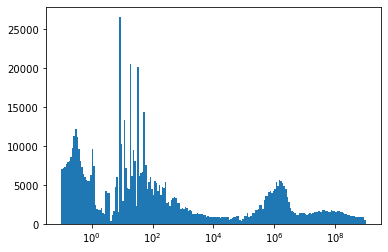

In [18]:
hist_ArIn, bins_ArIn, _ = plt.hist(en_ArIn_select, bins = logbins, range = (0, 1e9))
plt.xscale('log')

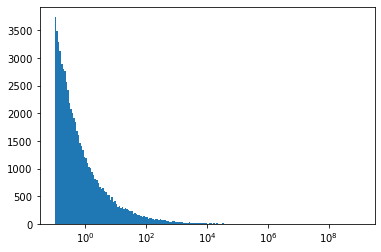

In [13]:
hist_ArIn_high_bg , _, _= plt.hist(bg_ArIn_high_en, bins = logbins, range = (0, 1e9))
plt.xscale('log')

NameError: name 'bg_ArIn_high_en' is not defined

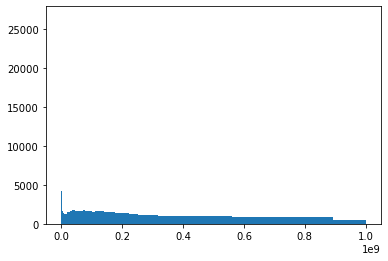

In [19]:
hist_ArIn, bins_ArIn, _ = plt.hist(en_ArIn_select, bins = logbins, range = (0, 1e9))
hist_ArIn_high_bg , _, _= plt.hist(bg_ArIn_high_en, bins = logbins, range = (0, 1e9))
plt.xscale('log')
plt.yscale('log')

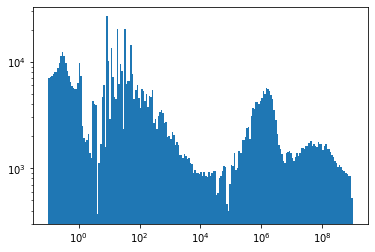

In [16]:
hist_ArIn, bins_ArIn, _ = plt.hist(en_ArIn_select, bins = logbins, range = (0, 1e9))
#hist_ArIn_high_bg , _, _= plt.hist(bg_ArIn_high_en, bins = logbins, range = (0, 1e9))
plt.xscale('log')
plt.yscale('log')

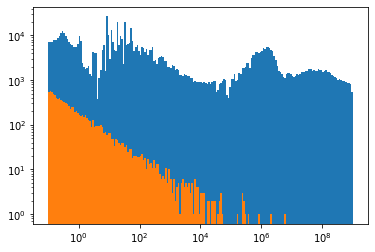

In [20]:
hist_ArIn, bins_ArIn, _ = plt.hist(en_ArIn_select, bins = logbins, range = (0, 1e9))
hist_ArIn_low_bg , _, _= plt.hist(bg_ArIn_low_en, bins = logbins, range = (0, 1e9))
plt.xscale('log')
plt.yscale('log')

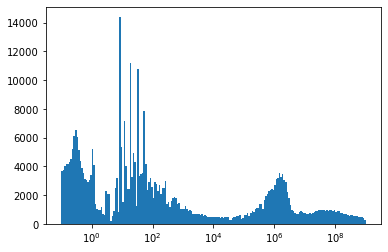

In [22]:
hist_ArOut, bins_ArOut, _ = plt.hist(en_ArOut_select, bins = logbins, range = (0, 1e9))
plt.xscale('log')

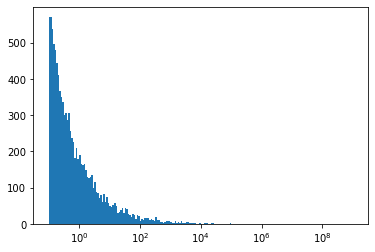

In [24]:
hist_ArIn_low_bg, _, _ = plt.hist(bg_ArIn_low_en, bins = logbins, range = (0, 1e9))
plt.xscale('log')

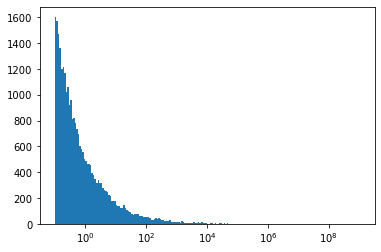

In [21]:
hist_ArIn_mid_bg , _, _= plt.hist(bg_ArIn_mid_en, bins = logbins, range = (0, 1e9))
plt.xscale('log')

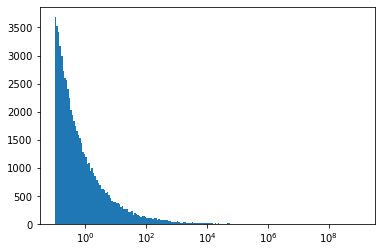

In [26]:
hist_ArIn_high_bg , _, _= plt.hist(bg_ArIn_high_en, bins = logbins, range = (0, 1e9))
plt.xscale('log')

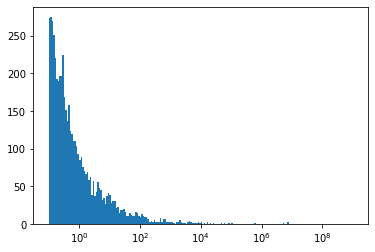

In [27]:
hist_ArOut_low_bg, _, _ = plt.hist(bg_ArOut_low_en, bins = logbins, range = (0, 1e9))
plt.xscale('log')

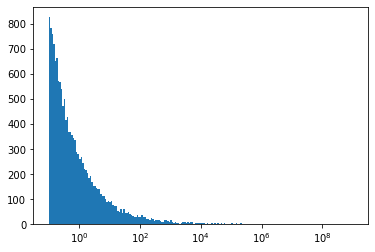

In [28]:
hist_ArOut_mid_bg, _, _ = plt.hist(bg_ArOut_mid_en, bins = logbins, range = (0, 1e9))
plt.xscale('log')

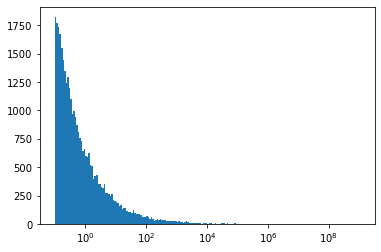

In [29]:
hist_ArOut_high_bg, _, _ = plt.hist(bg_ArOut_high_en, bins = logbins, range = (0, 1e9))
plt.xscale('log')

In [23]:
err_ArIn = np.sqrt(hist_ArIn)
err_ArOut = np.sqrt(hist_ArOut)
x_en = (bins_ArIn[1:] + bins_ArIn[:-1]) / 2

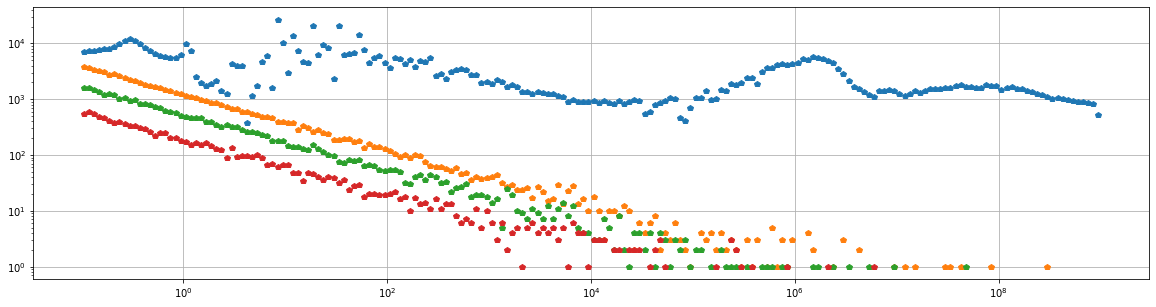

In [22]:
plt.figure(figsize=(20,5))
plt.errorbar(x_en, hist_ArIn, yerr=err_ArIn, fmt="p")
plt.errorbar(x_en, hist_ArIn_high_bg, fmt="p")
plt.errorbar(x_en, hist_ArIn_mid_bg, fmt="p")
plt.errorbar(x_en, hist_ArIn_low_bg, fmt="p")
plt.xscale('log')
plt.yscale('log')
plt.grid()

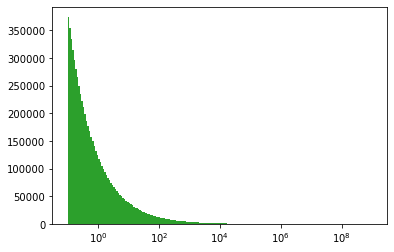

In [25]:
hist_ArIn_low_bg_100, _, _ = plt.hist(bg_ArIn_low_en_100, bins = logbins, range = (0, 1e9))
hist_ArIn_mid_bg_100, _, _ = plt.hist(bg_ArIn_mid_en_100, bins = logbins, range = (0, 1e9))
hist_ArIn_high_bg_100, _, _ = plt.hist(bg_ArIn_high_en_100, bins = logbins, range = (0, 1e9))
plt.xscale('log')

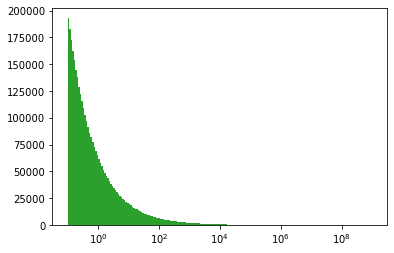

In [28]:
hist_ArOut_low_bg_100, _, _ = plt.hist(bg_ArOut_low_en_100, bins = logbins, range = (0, 1e9))
hist_ArOut_mid_bg_100, _, _ = plt.hist(bg_ArOut_mid_en_100, bins = logbins, range = (0, 1e9))
hist_ArOut_high_bg_100, _, _ = plt.hist(bg_ArOut_high_en_100, bins = logbins, range = (0, 1e9))
plt.xscale('log')

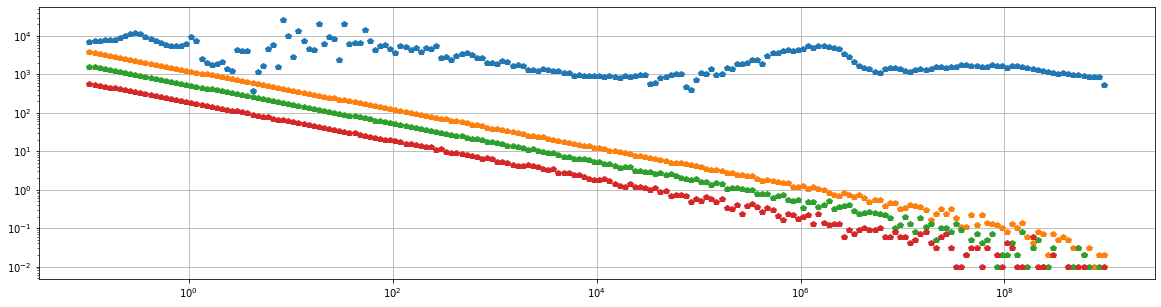

In [26]:
plt.figure(figsize=(20,5))
plt.errorbar(x_en, hist_ArIn, yerr=err_ArIn, fmt="p")
plt.errorbar(x_en, hist_ArIn_high_bg_100/100, fmt="p")
plt.errorbar(x_en, hist_ArIn_mid_bg_100/100, fmt="p")
plt.errorbar(x_en, hist_ArIn_low_bg_100/100, fmt="p")
plt.xscale('log')
plt.yscale('log')
plt.grid()

In [ ]:
plt.figure(figsize=(20,5))
plt.errorbar(x_en, hist_ArIn, yerr=err_ArIn, fmt="p")
plt.xscale('log')
plt.grid()

In [30]:
hist_ArIn_low = hist_ArIn - hist_ArIn_low_bg
hist_ArIn_mid = hist_ArIn - hist_ArIn_mid_bg
hist_ArIn_high = hist_ArIn - hist_ArIn_high_bg
hist_ArOut_low = hist_ArOut - hist_ArOut_low_bg
hist_ArOut_mid = hist_ArOut - hist_ArOut_mid_bg
hist_ArOut_high = hist_ArOut - hist_ArOut_high_bg

In [29]:
hist_ArIn_low = hist_ArIn - hist_ArIn_low_bg_100/100
hist_ArIn_mid = hist_ArIn - hist_ArIn_mid_bg_100/100
hist_ArIn_high = hist_ArIn - hist_ArIn_high_bg_100/100
hist_ArOut_low = hist_ArOut - hist_ArOut_low_bg_100/100
hist_ArOut_mid = hist_ArOut - hist_ArOut_mid_bg_100/100
hist_ArOut_high = hist_ArOut - hist_ArOut_high_bg_100/100

In [30]:
hist_ArIn_high

array([ 3331.85,  3653.46,  3948.28,  4565.12,  4973.47,  5211.65,
        5977.06,  7299.84,  8899.87, 10010.33,  9086.37,  7669.21,
        6250.18,  5488.7 ,  4752.03,  4393.15,  4104.93,  4168.56,
        4230.53,  5020.31,  8501.6 ,  6293.62,  1418.59,   939.22,
         808.03,   963.33,  1275.41,   604.89,   503.45,  3597.63,
        3298.72,  3319.32,  -226.28,   562.69,  1167.56,  4199.68,
        5511.62,  1134.45, 26156.36,  9827.42,  2520.91, 13021.2 ,
        6879.28,  4345.07,  4140.52, 20192.59,  5907.24,  9286.32,
        7888.51,  2104.53, 19920.58,  5959.21,  6363.34,  6461.41,
       14222.64,  7445.15,  4291.4 ,  5233.61,  5844.18,  4418.3 ,
        3554.95,  5391.07,  5140.61,  4149.06,  4908.6 ,  3628.83,
        4694.83,  4590.8 ,  5372.36,  2563.7 ,  2803.35,  2258.65,
        3004.01,  3283.03,  3452.05,  3233.76,  2629.59,  2680.56,
        1934.5 ,  1972.4 ,  1842.62,  2150.78,  2030.24,  1607.45,
        1742.79,  1627.56,  1306.52,  1304.27,  1220.32,  1332

In [31]:
hist_ArIn_high[hist_ArIn_high < 0] = 0

In [32]:
x_tof = (bins_ArIn[1:] + bins_ArIn[:-1]) / 2

In [33]:
error_ArIn_low = np.sqrt(hist_ArIn_low)
error_ArIn_low[error_ArIn_low == 0] = 0.7
error_ArIn_mid = np.sqrt(hist_ArIn_mid)
error_ArIn_mid[error_ArIn_mid == 0] = 0.7
error_ArIn_high = np.sqrt(hist_ArIn_high)
error_ArIn_high[error_ArIn_high == 0] = 0.7

In [34]:
tr_low, tr_error_low = transmission(hist_ArIn_low / norm_ArIn_low, error_ArIn_low / norm_ArIn_low, hist_ArOut_low / norm_ArOut_low, np.sqrt(hist_ArOut_low) / norm_ArOut_low)
tr_mid, tr_error_mid = transmission(hist_ArIn_mid / norm_ArIn_mid, error_ArIn_mid / norm_ArIn_mid, hist_ArOut_mid / norm_ArOut_mid, np.sqrt(hist_ArOut_mid) / norm_ArOut_mid)
tr_high, tr_error_high = transmission(hist_ArIn_high / norm_ArIn_high, error_ArIn_high / norm_ArIn_high, hist_ArOut_high / norm_ArOut_high, np.sqrt(hist_ArOut_high) / norm_ArOut_high)

/var/folders/px/8t76vndx7w7gx0d_zvq9m_l40000gn/T/ipykernel_59749/2425192978.py:3: RuntimeWarning: invalid value encountered in sqrt
  tr_high, tr_error_high = transmission(hist_ArIn_high / norm_ArIn_high, error_ArIn_high / norm_ArIn_high, hist_ArOut_high / norm_ArOut_high, np.sqrt(hist_ArOut_high) / norm_ArOut_high)


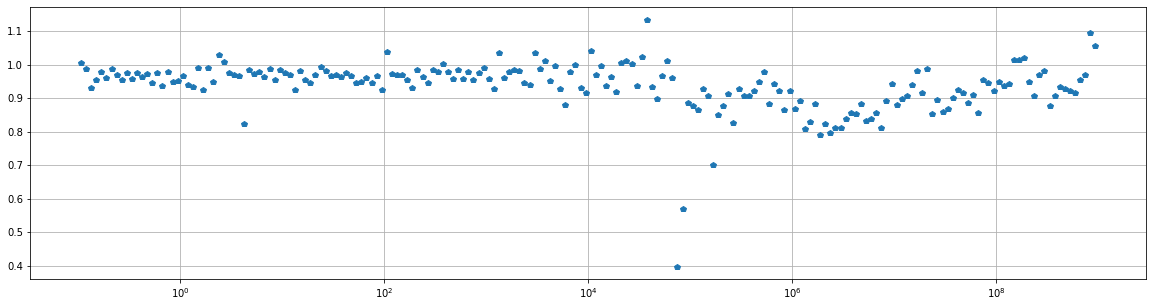

In [35]:
plt.figure(figsize=(20,5))
plt.errorbar(x_tof, tr_low, fmt="p")
plt.xscale('log')
plt.grid()

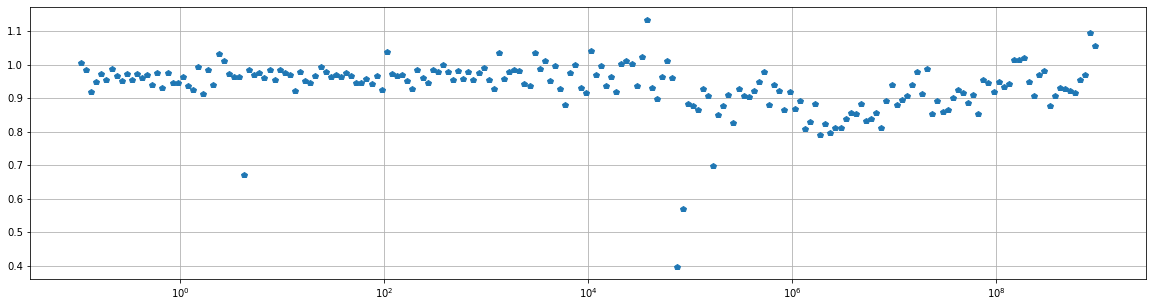

In [36]:
plt.figure(figsize=(20,5))
plt.errorbar(x_tof, tr_mid, fmt="p")
plt.xscale('log')
plt.grid()

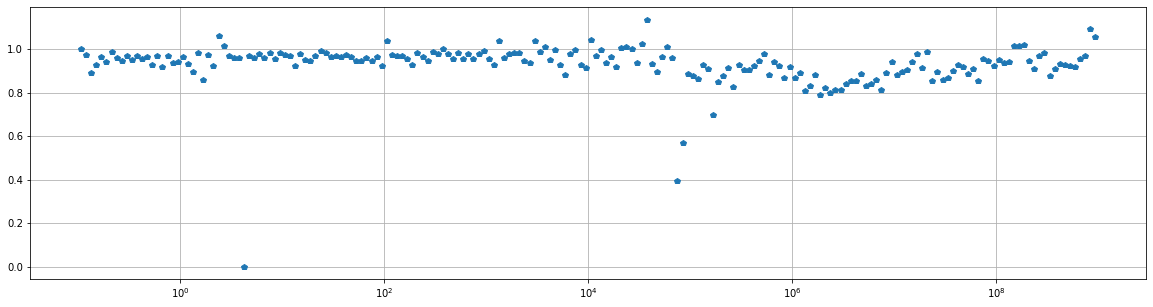

In [37]:
plt.figure(figsize=(20,5))
plt.errorbar(x_tof, tr_high, fmt="p")
plt.xscale('log')
plt.grid()

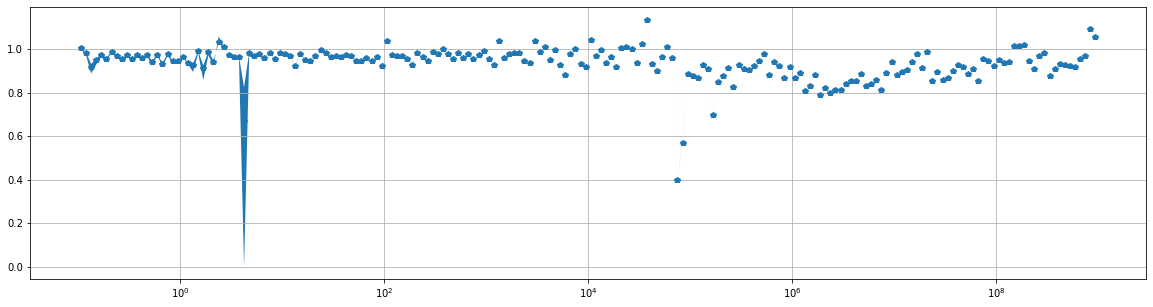

In [38]:
plt.figure(figsize=(20,5))
plt.errorbar(x_tof, tr_mid, fmt="p")
plt.fill_between(x_tof, tr_low, tr_high)
plt.xscale('log')
plt.grid()

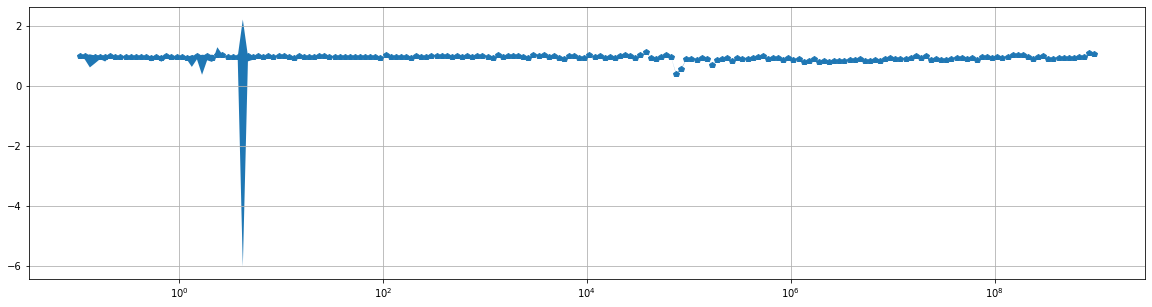

In [39]:
plt.figure(figsize=(20,5))
plt.errorbar(x_tof, tr_mid, fmt="p")
plt.fill_between(x_tof, tr_mid - 10 * (tr_mid - tr_low) , tr_mid + 10 * (tr_high - tr_mid))
plt.xscale('log')
plt.grid()

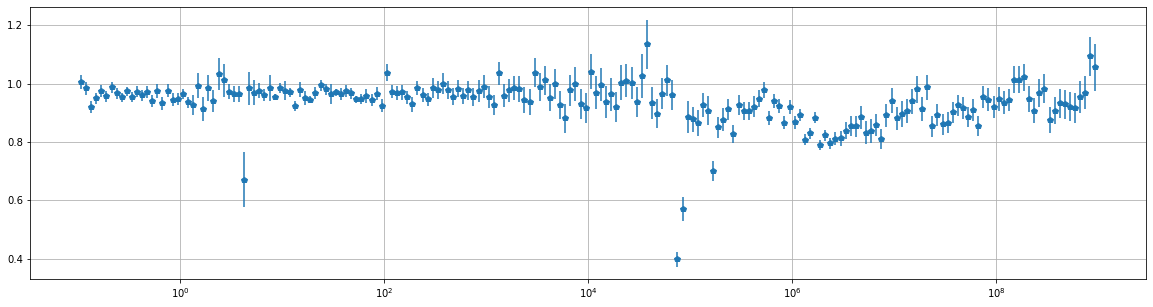

In [40]:
plt.figure(figsize=(20,5))
plt.errorbar(x_tof, tr_mid, yerr=tr_error_mid, fmt="p")
plt.xscale('log')
plt.grid()

In [50]:
tr_error_sys_up = tr_high - tr_mid
tr_error_sys_down = tr_mid - tr_low

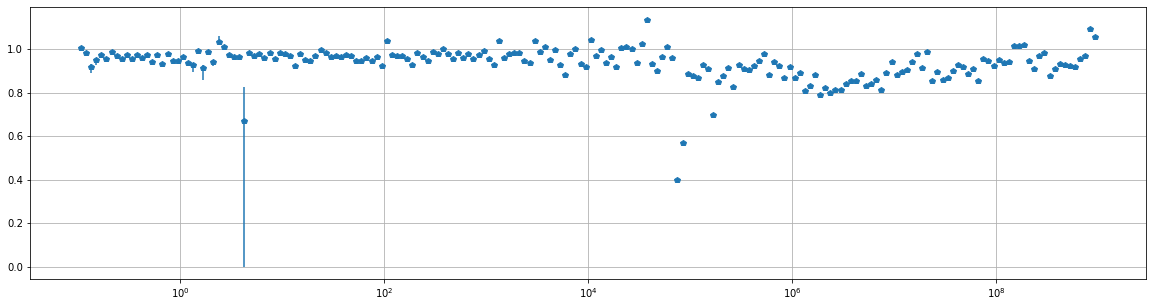

In [51]:
plt.figure(figsize=(20,5))
plt.errorbar(x_tof, tr_mid, yerr=[tr_error_sys_down,tr_error_sys_up], fmt="p")
plt.xscale('log')
plt.grid()

In [53]:
en_ArIn_select_mid_short = tof_to_energy(tof_ArIn_select_mid / 1e9, 182.3-0.042, 939.56542, 299792458) * 1e6
en_ArIn_select_mid_long = tof_to_energy(tof_ArIn_select_mid / 1e9, 182.3+0.042, 939.56542, 299792458) * 1e6
en_ArOut_select_mid_short = tof_to_energy(tof_ArOut_select_mid / 1e9, 182.3-0.042, 939.56542, 299792458) * 1e6
en_ArOut_select_mid_long = tof_to_energy(tof_ArOut_select_mid / 1e9, 182.3+0.042, 939.56542, 299792458) * 1e6

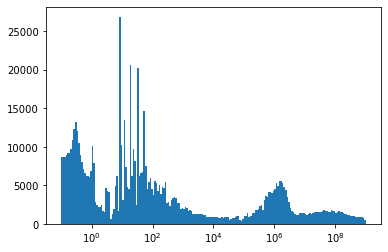

In [54]:
hist_ArIn_mid_short, bins_ArIn_mid_short, _ = plt.hist(en_ArIn_select_mid_short, bins = logbins, range = (0, 1e9))
plt.xscale('log')

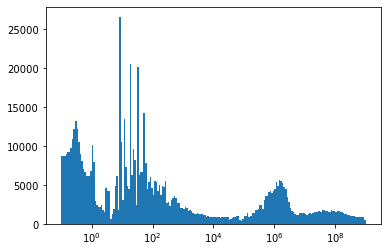

In [55]:
hist_ArIn_mid_long, bins_ArIn_mid_long, _ = plt.hist(en_ArIn_select_mid_long, bins = logbins, range = (0, 1e9))
plt.xscale('log')

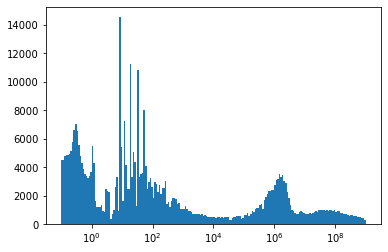

In [56]:
hist_ArOut_mid_short, bins_ArOut_mid_short, _ = plt.hist(en_ArOut_select_mid_short, bins = logbins, range = (0, 1e9))
plt.xscale('log')

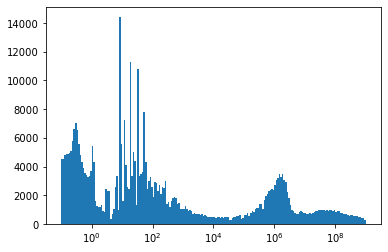

In [57]:
hist_ArOut_mid_long, bins_ArOut_mid_long, _ = plt.hist(en_ArOut_select_mid_long, bins = logbins, range = (0, 1e9))
plt.xscale('log')

In [58]:
error_ArIn_mid_short = np.sqrt(hist_ArIn_mid_short)
error_ArIn_mid_short[error_ArIn_mid_short == 0] = 0.7
error_ArIn_mid = np.sqrt(hist_ArIn_mid)
error_ArIn_mid[error_ArIn_mid == 0] = 0.7
error_ArIn_mid_long = np.sqrt(hist_ArIn_mid_long)
error_ArIn_mid_long[error_ArIn_mid_long == 0] = 0.7

In [59]:
tr_mid_short, tr_error_mid_short = transmission(hist_ArIn_mid_short / norm_ArIn_mid, error_ArIn_mid_short / norm_ArIn_mid, hist_ArOut_mid_short / norm_ArOut_mid, np.sqrt(hist_ArOut_mid_short) / norm_ArOut_mid)
tr_mid, tr_error_mid = transmission(hist_ArIn_mid / norm_ArIn_mid, error_ArIn_mid / norm_ArIn_mid, hist_ArOut_mid / norm_ArOut_mid, np.sqrt(hist_ArOut_mid) / norm_ArOut_mid)
tr_mid_long, tr_error_mid_long = transmission(hist_ArIn_mid_long / norm_ArIn_mid, error_ArIn_mid_long / norm_ArIn_mid, hist_ArOut_mid_long / norm_ArOut_mid, np.sqrt(hist_ArOut_mid_long) / norm_ArOut_mid)

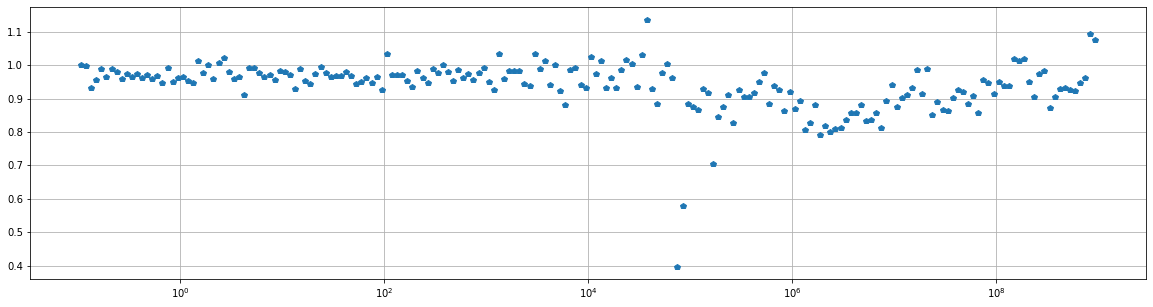

In [60]:
plt.figure(figsize=(20,5))
plt.errorbar(x_tof, tr_mid_short, fmt="p")
plt.xscale('log')
plt.grid()

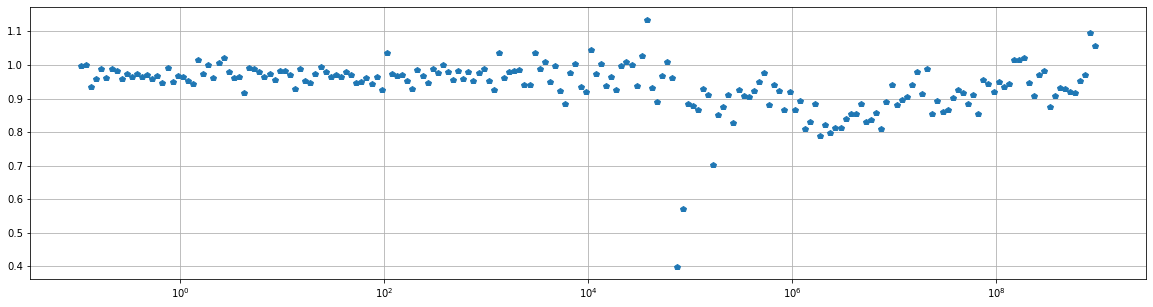

In [61]:
plt.figure(figsize=(20,5))
plt.errorbar(x_tof, tr_mid, fmt="p")
plt.xscale('log')
plt.grid()

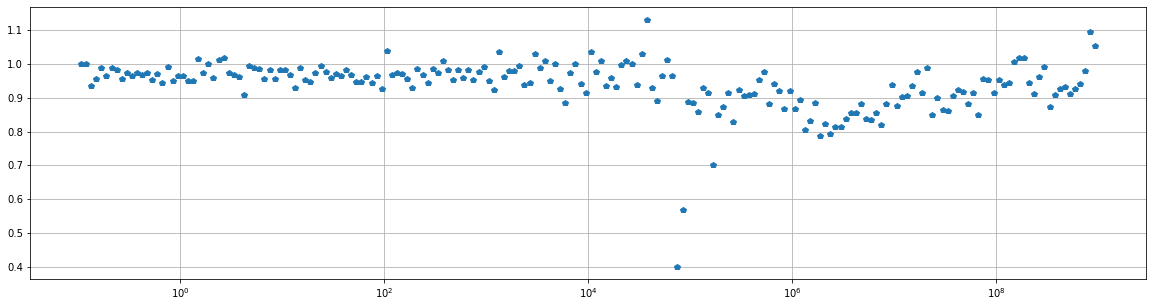

In [62]:
plt.figure(figsize=(20,5))
plt.errorbar(x_tof, tr_mid_long, fmt="p")
plt.xscale('log')
plt.grid()

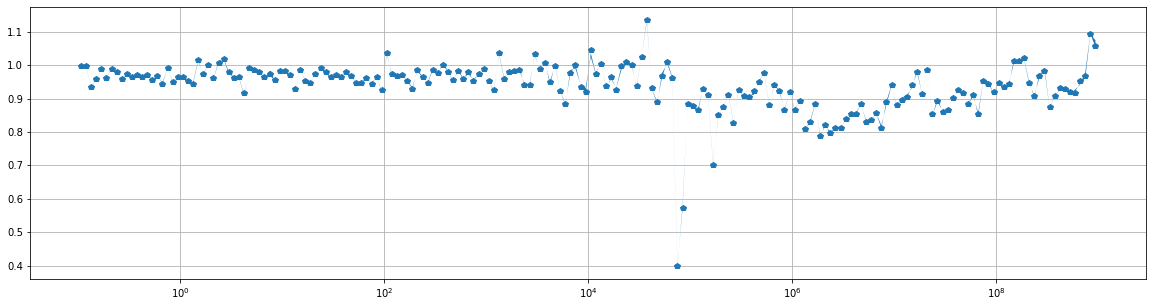

In [63]:
plt.figure(figsize=(20,5))
plt.errorbar(x_tof, tr_mid, fmt="p")
plt.fill_between(x_tof, tr_mid_short, tr_mid_long)
plt.xscale('log')
plt.grid()

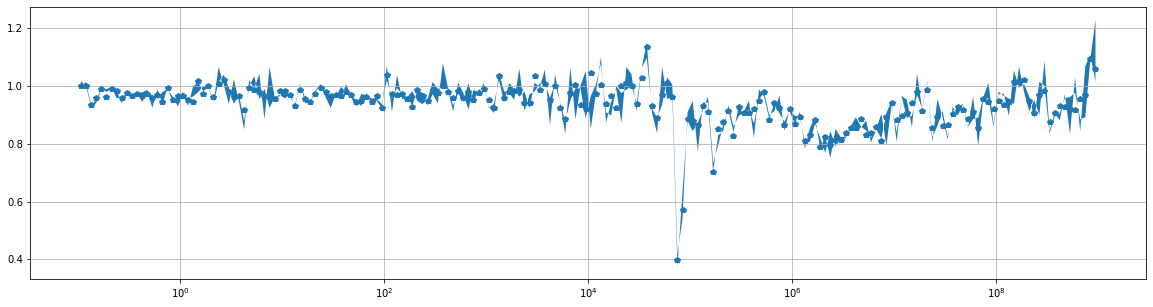

In [65]:
plt.figure(figsize=(20,5))
plt.errorbar(x_tof, tr_mid, fmt="p")
plt.fill_between(x_tof, tr_mid - 10 * (tr_mid - tr_mid_short), tr_mid + 10 * (tr_mid_long - tr_mid))
plt.xscale('log')
plt.grid()